In [3]:
# Health Insurance prediction

##Author: Naveed Sultan

In [1]:

import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/health-insurance-cross-sell-prediction/train.csv
/kaggle/input/health-insurance-cross-sell-prediction/test.csv
/kaggle/input/health-insurance-cross-sell-prediction/sample_submission.csv


In [2]:
train = pd.read_csv('/input/health-insurance-cross-sell-prediction/train.csv')
test = pd.read_csv('/input/health-insurance-cross-sell-prediction/test.csv')

In [3]:
def eda(dfA, all=False, desc='Exploratory Data Analysis'):
    print(desc)
    print(f'\nShape:\n{dfA.shape}')
    print(f'\nIs Null: {dfA.isnull().sum().sum()}')
    print(f'{dfA.isnull().mean().sort_values(ascending=False)}')
    dup = dfA.duplicated()
    print(f'\nDuplicated: \n{dfA[dup].shape}\n')
    try:
        print(dfA[dfA.duplicated(keep=False)].sample(4))
    except:
        pass
    if all:  # here you put yours prefered analysis that detail more your dataset

        print(f'\nDTypes - Numerics')
        print(dfA.describe(include=[np.number]))
        print(f'\nDTypes - Categoricals')
        print(dfA.describe(include=['object']))

        # print(df.loc[:, df.dtypes=='object'].columns)
        print(f'\nHead:\n{dfA.head()}')
        print(f'\nSamples:\n{dfA.sample(2)}')
        print(f'\nTail:\n{dfA.tail()}')

In [4]:
eda(train)

Exploratory Data Analysis

Shape:
(381109, 12)

Is Null: 0
Response                0.0
Vintage                 0.0
Policy_Sales_Channel    0.0
Annual_Premium          0.0
Vehicle_Damage          0.0
Vehicle_Age             0.0
Previously_Insured      0.0
Region_Code             0.0
Driving_License         0.0
Age                     0.0
Gender                  0.0
id                      0.0
dtype: float64

Duplicated: 
(0, 12)



In [5]:
train.columns = train.columns.str.lower()

In [6]:
train.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [7]:
eda(test)

Exploratory Data Analysis

Shape:
(127037, 11)

Is Null: 0
Vintage                 0.0
Policy_Sales_Channel    0.0
Annual_Premium          0.0
Vehicle_Damage          0.0
Vehicle_Age             0.0
Previously_Insured      0.0
Region_Code             0.0
Driving_License         0.0
Age                     0.0
Gender                  0.0
id                      0.0
dtype: float64

Duplicated: 
(0, 11)



In [8]:
test.columns = test.columns.str.lower()
test.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
gender = train.gender.unique()
gender

array(['Male', 'Female'], dtype=object)

In [11]:
m = train[train.gender == gender[0]]['gender'].shape[0]
f = train[train.gender == gender[1]]['gender'].shape[0]

([<matplotlib.patches.Wedge at 0x7fdd39f3e190>,
 [Text(-0.14047625142251505, 1.0909933193133121, 'Male'),
  Text(0.14047625142251538, -1.0909933193133121, 'Female')],
 [Text(-0.07662340986682638, 0.5950872650799883, '54.1%'),
  Text(0.07662340986682657, -0.5950872650799883, '45.9%')])

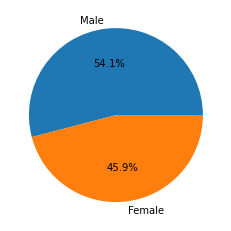

In [12]:
plt.pie([m,f], labels=gender, autopct='%1.1f%%')

In [13]:
age = train[['id', 'age']].groupby('age').count()
age

,id
age,
20,6232
21,16457
22,20964
23,24256
24,25960
...,...
81,56
82,29
83,22


Text(0.5, 1.0, 'Age')

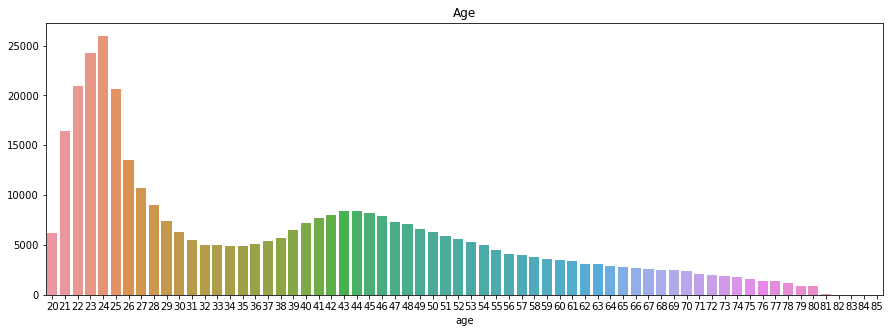

In [14]:
fig, ax1 = plt.subplots( sharey=True, figsize=(15,5))
sns.barplot(x=age.index, y=age.id.values, ax=ax1).set_title('Age')

In [15]:
def sepColumns(dataset):
    num = []
    cat = []
    for i in dataset.columns:
        if dataset[i].dtype == 'object':
            cat.append(i)
        else:
            num.append(i)
    return num, cat

In [16]:
num, cat = sepColumns(train)
train[cat]

,gender,vehicle_age,vehicle_damage
0,Male,> 2 Years,Yes
1,Male,1-2 Year,No
2,Male,> 2 Years,Yes
3,Male,< 1 Year,No
4,Female,< 1 Year,No
...,...,...,...
381104,Male,1-2 Year,No
381105,Male,< 1 Year,No
381106,Male,< 1 Year,No
381107,Female,> 2 Years,Yes


In [17]:
vuCat = dict()
for c in cat:
    v = train[c].unique().tolist()
    vuCat[c] = v
print(vuCat)

{'gender': ['Male', 'Female'], 'vehicle_age': ['> 2 Years', '1-2 Year', '< 1 Year'], 'vehicle_damage': ['Yes', 'No']}


In [18]:
for vc in vuCat:
#     print(vc, vuCat[vc])
    newCol = f'{vc}_N'
    train[newCol] = train[vc].apply(lambda x: vuCat[vc].index(x))

In [19]:
train.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response,gender_N,vehicle_age_N,vehicle_damage_N
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,0,0,0
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,0,1,1
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,0,0,0
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,0,2,1
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,1,2,1


In [20]:
numTrain, catTrain = sepColumns(train)
train[numTrain]

,id,age,driving_license,region_code,previously_insured,annual_premium,policy_sales_channel,vintage,response,gender_N,vehicle_age_N,vehicle_damage_N
0,1,44,1,28.0,0,40454.0,26.0,217,1,0,0,0
1,2,76,1,3.0,0,33536.0,26.0,183,0,0,1,1
2,3,47,1,28.0,0,38294.0,26.0,27,1,0,0,0
3,4,21,1,11.0,1,28619.0,152.0,203,0,0,2,1
4,5,29,1,41.0,1,27496.0,152.0,39,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,74,1,26.0,1,30170.0,26.0,88,0,0,1,1
381105,381106,30,1,37.0,1,40016.0,152.0,131,0,0,2,1
381106,381107,21,1,30.0,1,35118.0,160.0,161,0,0,2,1
381107,381108,68,1,14.0,0,44617.0,124.0,74,0,1,0,0


**test data**

In [21]:
test.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [22]:
numTest, catTest = sepColumns(test)
test[catTest]

,gender,vehicle_age,vehicle_damage
0,Male,< 1 Year,No
1,Male,1-2 Year,Yes
2,Male,1-2 Year,Yes
3,Male,< 1 Year,Yes
4,Male,< 1 Year,No
...,...,...,...
127032,Female,< 1 Year,No
127033,Female,1-2 Year,Yes
127034,Male,< 1 Year,No
127035,Male,1-2 Year,No


In [23]:
vuCatTest = dict()
for c in catTest:
    v = test[c].unique().tolist()
    vuCatTest[c] = v
print(vuCatTest)

{'gender': ['Male', 'Female'], 'vehicle_age': ['< 1 Year', '1-2 Year', '> 2 Years'], 'vehicle_damage': ['No', 'Yes']}


In [24]:
for vc in vuCatTest:
    newCol = f'{vc}_N'
    test[newCol] = test[vc].apply(lambda x: vuCatTest[vc].index(x))

In [25]:
test

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,gender_N,vehicle_age_N,vehicle_damage_N
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53,0,0,0
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111,0,1,1
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199,0,1,1
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187,0,0,1
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56,1,0,0
127033,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165,1,1,1
127034,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74,0,0,0
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265,0,1,0


In [26]:
numTest, catTest = sepColumns(test)
test[numTest]

,id,age,driving_license,region_code,previously_insured,annual_premium,policy_sales_channel,vintage,gender_N,vehicle_age_N,vehicle_damage_N
0,381110,25,1,11.0,1,35786.0,152.0,53,0,0,0
1,381111,40,1,28.0,0,33762.0,7.0,111,0,1,1
2,381112,47,1,28.0,0,40050.0,124.0,199,0,1,1
3,381113,24,1,27.0,1,37356.0,152.0,187,0,0,1
4,381114,27,1,28.0,1,59097.0,152.0,297,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,26,1,37.0,1,30867.0,152.0,56,1,0,0
127033,508143,38,1,28.0,0,28700.0,122.0,165,1,1,1
127034,508144,21,1,46.0,1,29802.0,152.0,74,0,0,0
127035,508145,71,1,28.0,1,62875.0,26.0,265,0,1,0


**correlation**

In [27]:
def correlation(df, varT, xpoint=-0.5, showGraph=True):
    corr = df.corr()
    print(f'\nFeatures correlation:\n'
          f'Target: {varT}\n'
          f'Reference.: {xpoint}\n'
          f'\nMain features:')
    corrs = corr[varT]
    features = []
    for i in range(0, len(corrs)):
        if corrs[i] > xpoint and corrs.index[i] != varT:
            print(corrs.index[i], f'{corrs[i]:.2f}')
            features.append(corrs.index[i])
    if showGraph:
        fig, ax1 = plt.subplots( sharey=True, figsize=(15,10))
        sns.heatmap(corr,
                    annot=True, fmt='.2f', vmin=-1, vmax=1, linewidth=0.01,
                    linecolor='black', cmap='RdBu_r', ax=ax1
                    )
        plt.title('Correlations between features w/ target')
        plt.show()
    return features


Features correlation:
Target: response
Reference.: 0.01

Main features:
age 0.11
driving_license 0.01
region_code 0.01
annual_premium 0.02


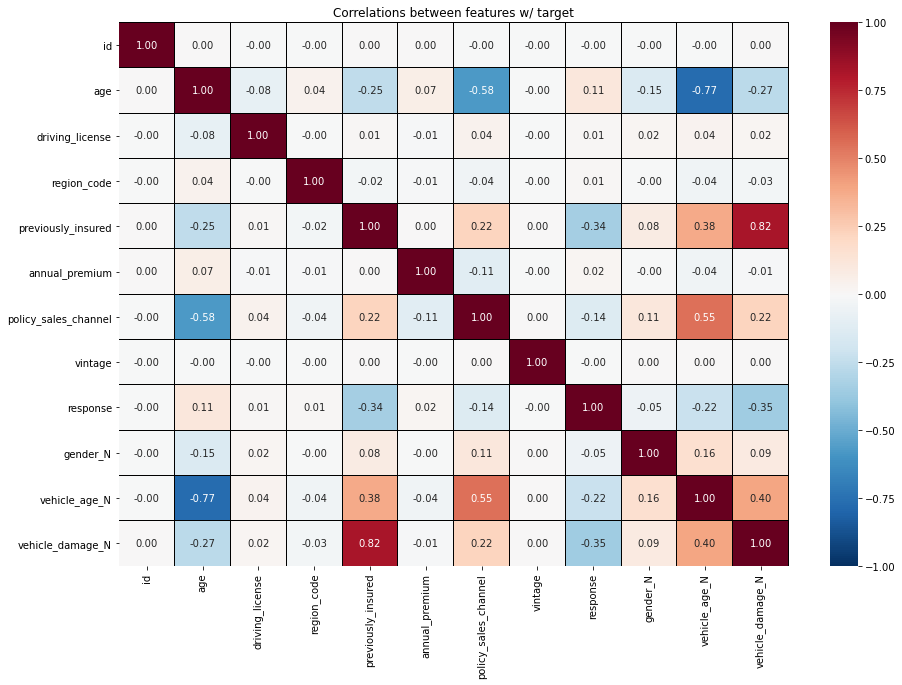

In [28]:
varTarget = 'response'
varFeatures = correlation(train[numTrain], varTarget, 0.01)

**Prediction**

In [29]:
# ML Algoritmos
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, PoissonRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyRegressor

# ML selecao de dados de treino e teste
from sklearn.model_selection import train_test_split
# calcular o menor erro medio absoluto entre 2 dados apresentados
from sklearn.metrics import mean_absolute_error

**choosing one regressor**

In [30]:
# I used this to choose what the Regressor fit better with data

# nrs = np.random.randint(1,43)
# nest = np.random.randint(1,43)
# regressors = [
#         LogisticRegression(random_state=nrs),
#         DecisionTreeRegressor(random_state=nrs),
#         RandomForestRegressor(n_estimators=nest, random_state=nrs),
#         SVR(C=1.0, epsilon=0.2),
#         LinearRegression(),
#         GradientBoostingRegressor(n_estimators=nest, random_state=nrs),
#         PoissonRegressor(),
#         DummyRegressor(strategy="mean"),
#         GaussianNB(),
#         AdaBoostRegressor(n_estimators=nest, random_state=nrs)
#     ]

# X = train[varFeatures]
# y = train[varTarget]
# Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size=0.3, random_state=42)

# reg = []
# mae = []
# sco = []

# for regressor in regressors:
#     modelo = regressor
#     modelo.fit(Xtreino, np.array(ytreino))
#     sco.append(modelo.score(Xtreino, ytreino))
#     previsao = modelo.predict(Xteste)
#     mae.append(round(mean_absolute_error(yteste, previsao), 2))
#     reg.append(regressor)

# meuMae = pd.DataFrame(columns=['Regressor', 'mae', 'score'])
# meuMae['Regressor'] = reg
# meuMae['mae'] = mae
# meuMae['score'] = sco
# meuMae = meuMae.sort_values(by='score', ascending=False)

# print('Best score: ', meuMae["Regressor"].values[0])

Applying best regressor

In [31]:
Xtreino = train[varFeatures]
ytreino = train[varTarget]
Xteste = test[varFeatures]

modelo = LogisticRegression(random_state=44)  #meuMae["Regressor"].values[0]
modelo.fit(Xtreino, np.array(ytreino))
score = modelo.score(Xtreino, ytreino)
predict = modelo.predict(Xteste)

print(f'Score: {score:.2f}')

Score: 0.88
